In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing the datasets

In [2]:
happy_Data = pd.read_csv("//Users//swatishrivastava//Desktop//archive (1)//2015.csv")

## Checking the rows

In [3]:
happy_Data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Checking the rows and columns

In [4]:
happy_Data.shape

(158, 12)

## Checking out some basic informations

In [5]:
happy_Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

## Checking out the statistical information of the numerical column

In [6]:
happy_Data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## Handling the missing data

In [7]:
happy_Data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Luckily here we don't have any missing values here. But incase we have then we should handle them carefully.
here are some methods to handle missing values:

Drop the missing values – If the dataset is huge and missing values are very few then we can directly.

drop the values because it will not have much impact.

Replace with mean values – We can replace the missing values with mean values, but this is not advisable in case if the data has outliers.

Replace with median values – We can replace the missing values with median values, and it is recommended in case if the data has outliers.

Replace with mode values – We can do this in the case of a Categorical feature.


## Checking for the duplicate values

It is important to handle the duplicate values carefully as the presence of the duplicates will affect our 
machine learning model

In [8]:
duplicate_Values = happy_Data.duplicated()
print(duplicate_Values.sum())

0


Here we don't have any duplicate values
If duplicates are present we can simply drop them

## Checking for the outliers

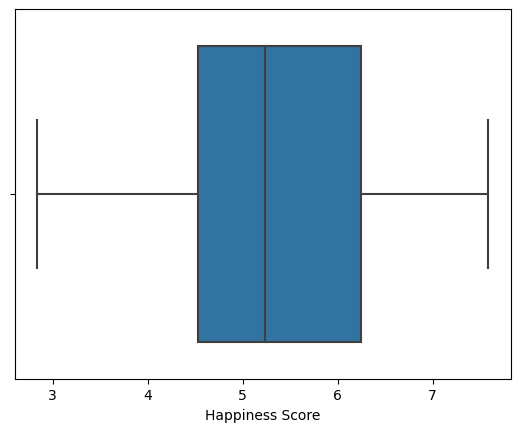

In [9]:
# Handling the outliers in the data, i.e the extreme values in the data. We can find the outliers in our data using the 
# Box plot


sns.boxplot(happy_Data["Happiness Score"])
plt.show()

Here we do not have outliers present in the dataset However if present we need to handle them very carefully.

 1.  we could either drop them, however dropping them always is not a good practice because there might be a situation 
were the outliers are justifiable.

2.   Replace the outlier using IQR (Interquartile range)

## Normalizing and scaling 

Data Normalization or feature scaling is a process to standardize the range of features of the data as the range may 
vary a lot. So we can preprocess the data using ML algorithms. So for this, we will use StandardScaler for the 
numerical values, which uses the formula as x-mean/std deviation.

In [10]:
from sklearn.preprocessing import StandardScaler
stdScale = StandardScaler()
stdScale

StandardScaler()

In [11]:
happy_Data["Happiness Score"] = stdScale.fit_transform(happy_Data[["Happiness Score"]])

In [12]:
happy_Data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,1.937360,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,1.914581,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,1.884792,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,1.880411,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,1.797179,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Correlation

We can find the pairwise correlation between the different columns of the data using the corr() method. 
(Note – All non-numeric data type column will be ignored.)

In [13]:
# The resulting coefficient is a value between -1 and 1 inclusive, where:

# 1: Total positive linear correlation
# 0: No linear correlation, the two variables most likely do not affect each other
# -1: Total negative linear correlation

<AxesSubplot:>

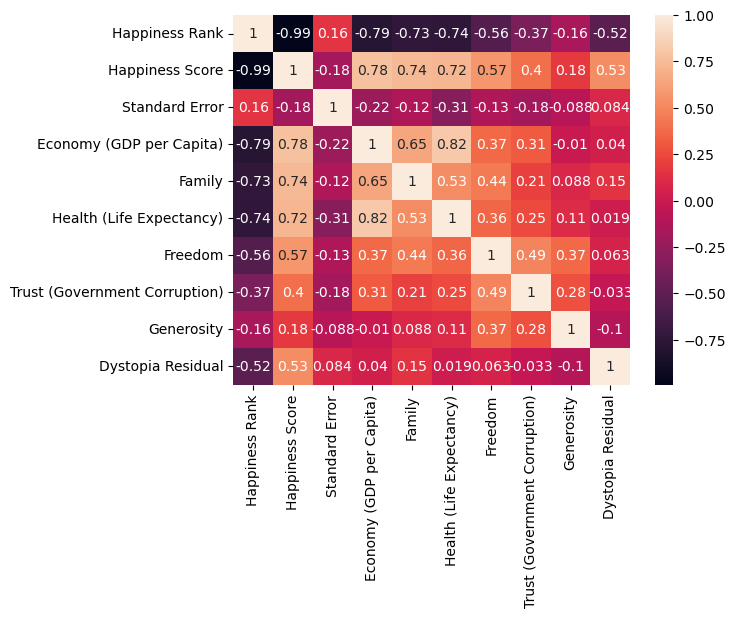

In [14]:
sns.heatmap(happy_Data.corr(), annot=True)

### Relationship between Economy( GDP per capita) and Happiness score

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

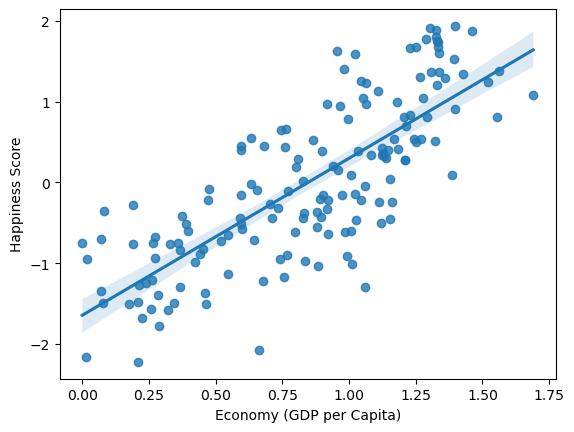

In [15]:
sns.regplot(x=happy_Data["Economy (GDP per Capita)"], y=happy_Data["Happiness Score"])

### Relationship between Family and Happiness score

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

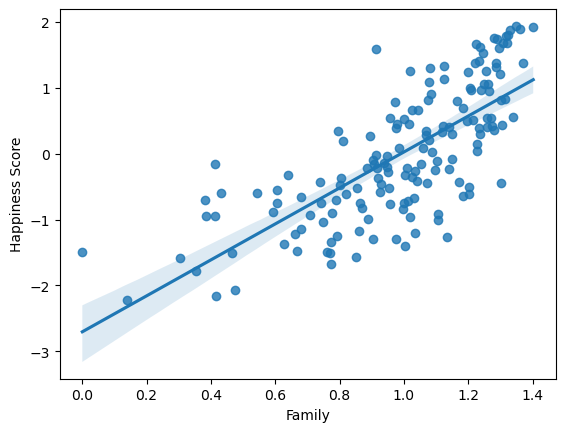

In [16]:
sns.regplot(x="Family", y="Happiness Score", data=happy_Data)

Family and Happiness score is directly related 

### Relationship between Health and happiness score

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

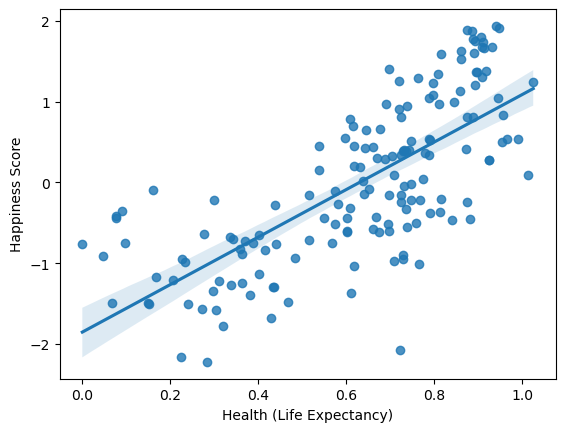

In [17]:
sns.regplot(x=happy_Data["Health (Life Expectancy)"], y=happy_Data["Happiness Score"])

Happiness is dependent on health, i.e. Good Health is equal to More Happy a person is.

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

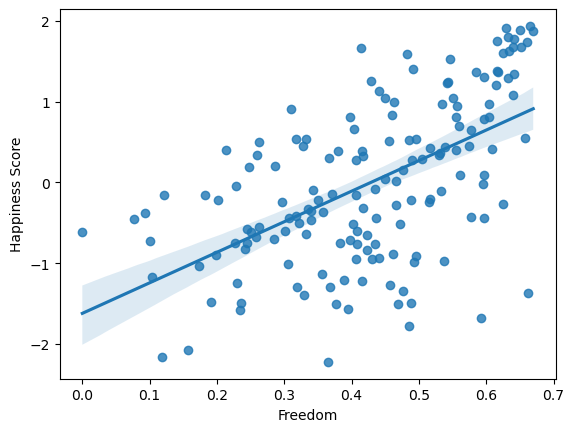

In [18]:
sns.regplot(x=happy_Data["Freedom"], y=happy_Data["Happiness Score"])